#Customer Churn Analysis
This project aims to predict customer churn using machine learning. We analyze customer demographics and service usage to identify who is likely to leave.

In [ ]:
import pandas as pd

df = pd.read_csv("telco.csv")
df.head()


,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [ ]:
df['Churn Label'].value_counts()


,count
Churn Label,
No,5174
Yes,1869


In [ ]:
df.columns


Index(['Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married', 'Dependents',
       'Number of Dependents', 'Country', 'State', 'City', 'Zip Code',
       'Latitude', 'Longitude', 'Population', 'Quarter', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Churn Label'],
      dtype='object')

In [ ]:
cols_to_drop = [
    'Customer ID',
    'Churn Score',
    'Churn Category',
    'Churn Reason',
    'Customer Status',
    'CLTV'
]

# Keep only columns that exist in df
cols_to_drop_existing = [col for col in cols_to_drop if col in df.columns]

# Drop them
df = df.drop(columns=cols_to_drop_existing)

# Check dataframe
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Under 30                           7043 non-null   object 
 3   Senior Citizen                     7043 non-null   object 
 4   Married                            7043 non-null   object 
 5   Dependents                         7043 non-null   object 
 6   Number of Dependents               7043 non-null   int64  
 7   Country                            7043 non-null   object 
 8   State                              7043 non-null   object 
 9   City                               7043 non-null   object 
 10  Zip Code                           7043 non-null   int64  
 11  Latitude                           7043 non-null   float

In [ ]:
# Check missing values
df.isnull().sum()


,0
Gender,0
Age,0
Under 30,0
Senior Citizen,0
Married,0
Dependents,0
Number of Dependents,0
Country,0
State,0
City,0


In [ ]:
df[binary_cols].head()


,Gender,Under 30,Senior Citizen,Married,Dependents,Referred a Friend,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Paperless Billing,Churn Label
0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1
1,0,0,1,1,1,1,1,1,0,1,0,0,0,0,0,1,1,1
2,1,0,1,0,1,0,1,1,0,0,0,0,1,1,1,1,1,1
3,0,0,1,1,1,1,1,0,0,1,1,0,1,1,0,1,1,1
4,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1


In [ ]:
# Check first 5 rows of encoded binary columns
print(df[binary_cols].head())


   Gender  Under 30  Senior Citizen  Married  Dependents  Referred a Friend  \
0       1         0               1        0           0                  0   
1       0         0               1        1           1                  1   
2       1         0               1        0           1                  0   
3       0         0               1        1           1                  1   
4       0         0               1        1           1                  1   

   Phone Service  Multiple Lines  Online Security  Online Backup  \
0              0               0                0              0   
1              1               1                0              1   
2              1               1                0              0   
3              1               0                0              1   
4              1               1                0              0   

   Device Protection Plan  Premium Tech Support  Streaming TV  \
0                       1                     0    

In [ ]:
# List of multi-category columns
multi_cat_cols = ['Country','State','City','Offer','Internet Service','Internet Type','Contract','Payment Method','Quarter']

# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

# Check the dataframe shape and first 5 rows
print(df.shape)
df.head()


(7043, 1151)


,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Zip Code,Latitude,Longitude,...,Offer_Offer C,Offer_Offer D,Offer_Offer E,Internet Service_Yes,Internet Type_DSL,Internet Type_Fiber Optic,Contract_One Year,Contract_Two Year,Payment Method_Credit Card,Payment Method_Mailed Check
0,1,78,0,1,0,0,0,90022,34.023810,-118.156582,...,False,False,False,True,True,False,False,False,False,False
1,0,74,0,1,1,1,1,90063,34.044271,-118.185237,...,False,False,True,True,False,True,False,False,True,False
2,1,71,0,1,0,1,3,90065,34.108833,-118.229715,...,False,True,False,True,False,True,False,False,False,False
3,0,78,0,1,1,1,1,90303,33.936291,-118.332639,...,True,False,False,True,False,True,False,False,False,False
4,0,80,0,1,1,1,1,90602,33.972119,-118.020188,...,True,False,False,True,False,True,False,False,False,False


In [ ]:
# Features (all columns except target)
X = df.drop('Churn Label', axis=1)

# Target
y = df['Churn Label']

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check shapes
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (5634, 1150)
X_test: (1409, 1150)
y_train: (5634,)
y_test: (1409,)


#Modeling Approach
Although churn is typically a classification problem (Yes/No), in this project, we are using Regression models to explore continuous prediction behavior.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize model
model = LogisticRegression(max_iter=1000)  # increase max_iter to converge

# Train model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8559261887863733

Confusion Matrix:
 [[938  71]
 [132 268]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      1009
           1       0.79      0.67      0.73       400

    accuracy                           0.86      1409
   macro avg       0.83      0.80      0.81      1409
weighted avg       0.85      0.86      0.85      1409



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,   # number of trees
    random_state=42,
    max_depth=10,       # limit depth to prevent overfitting
    class_weight='balanced'  # handle class imbalance
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.907735982966643

Confusion Matrix:
 [[922  87]
 [ 43 357]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      1009
           1       0.80      0.89      0.85       400

    accuracy                           0.91      1409
   macro avg       0.88      0.90      0.89      1409
weighted avg       0.91      0.91      0.91      1409



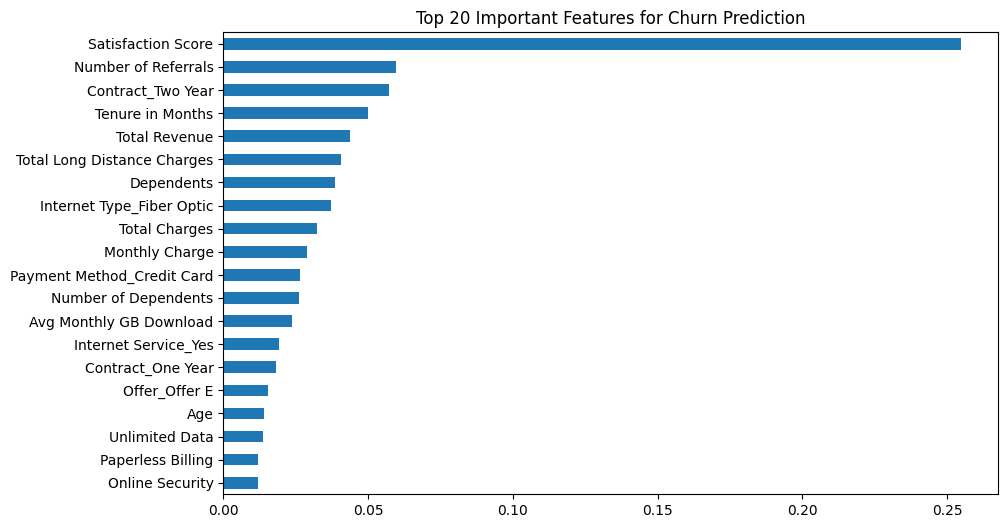

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
top_features = feature_importance.sort_values(ascending=False).head(20)

plt.figure(figsize=(10,6))
top_features.plot(kind='barh')
plt.title("Top 20 Important Features for Churn Prediction")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
print("Original X_train shape:", X_train.shape)
print("Resampled X_train shape:", X_train_res.shape)

print("Original y_train distribution:\n", y_train.value_counts())
print("Resampled y_train distribution:\n", pd.Series(y_train_res).value_counts())



Original X_train shape: (5634, 1150)
Resampled X_train shape: (8330, 1150)
Original y_train distribution:
 Churn Label
0    4165
1    1469
Name: count, dtype: int64
Resampled y_train distribution:
 Churn Label
1    4165
0    4165
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize Random Forest
rf_model_smote = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

# Train on resampled data
rf_model_smote.fit(X_train_res, y_train_res)

# Predict on original test set
y_pred_smote = rf_model_smote.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))


Accuracy: 0.8914123491838183

Confusion Matrix:
 [[927  82]
 [ 71 329]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      1009
           1       0.80      0.82      0.81       400

    accuracy                           0.89      1409
   macro avg       0.86      0.87      0.87      1409
weighted avg       0.89      0.89      0.89      1409



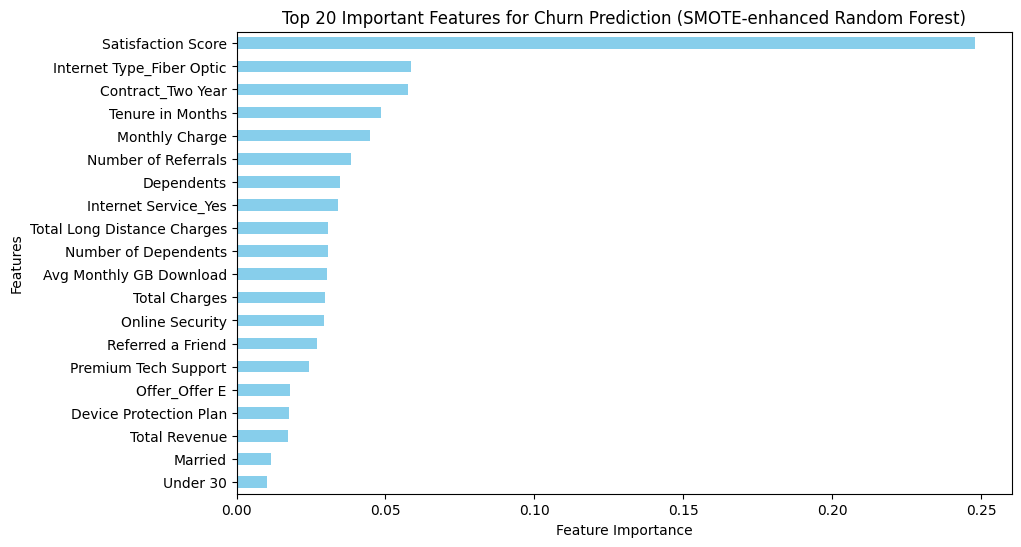

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
feature_importance = pd.Series(rf_model_smote.feature_importances_, index=X_train.columns)

# Sort top 20 important features
top_features = feature_importance.sort_values(ascending=False).head(20)

# Plot
plt.figure(figsize=(10,6))
top_features.plot(kind='barh', color='skyblue')
plt.title("Top 20 Important Features for Churn Prediction (SMOTE-enhanced Random Forest)")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # highest importance on top
plt.show()


#Conclusion
The model was successfully tuned to prioritize identifying potential churners. The feature importance analysis reveals which customer behaviors most strongly predict a high risk of leaving.